In [179]:
import os
import json
from glob import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
dpg_name = "dgp4"
root_dir = f"/Users/s11616/Desktop/{dpg_name}"

In [188]:
rows = []
for exp_name in os.listdir(root_dir):
    jsonfile_paths = glob(os.path.join(root_dir, exp_name, '*.json'))
    
    for jsonfile_path in jsonfile_paths:
        
        jsonfile_name = jsonfile_path.split('/')[-1]
        if jsonfile_name == 'RobynModel-inputs.json':
            continue
        
        with open(jsonfile_path) as f:
            dic = json.load(f)
        
        for i, vals in enumerate(dic['ExportedModel']['summary']):
            if vals['variable'] in ['(Intercept)', 'trend', 'season', 'holiday'] :
                continue
            
            rows.append([exp_name, jsonfile_name, vals['variable'].split('_')[-1], vals['performance']])

In [203]:
df = pd.DataFrame(rows)
df.columns = ['EXP_NAME', 'FILENAME', 'MEDIA', 'PRED_ROI']

df['DPG'] = dpg_name

In [204]:
df_true = pd.read_csv(os.path.join(root_dir, os.listdir(root_dir)[1], 'true_roi.csv'))

In [205]:
df_true

,x
0,roi of Facebook is: 1.91756896992852
1,roi of TV is: 0.477520179937832


In [206]:
# Glue Code
_df_true = pd.DataFrame({'MEDIA': ['Facebook', 'TV'], 'TRUE_ROI': [1.91756896992852 + 1, 0.475175414894113 + 1]})

In [207]:
df = pd.merge(df, _df_true, on='MEDIA')

In [208]:
df

,EXP_NAME,FILENAME,MEDIA,PRED_ROI,DPG,TRUE_ROI
0,prophet_TRUE_calib_,RobynModel-1_52_2.json,Facebook,4.5341,dgp4,2.917569
1,prophet_TRUE_calib_,RobynModel-1_48_13.json,Facebook,4.9029,dgp4,2.917569
2,prophet_TRUE_calib_,RobynModel-1_63_8.json,Facebook,4.9698,dgp4,2.917569
3,prophet_TRUE_calib_,RobynModel-1_56_12.json,Facebook,4.1458,dgp4,2.917569
4,prophet_TRUE_calib_,RobynModel-1_45_4.json,Facebook,4.6681,dgp4,2.917569
...,...,...,...,...,...,...
97,prophet_FALSE_calib_spend_TV,RobynModel-1_53_5.json,TV,2.0713,dgp4,1.475175
98,prophet_FALSE_calib_spend_TV,RobynModel-1_61_2.json,TV,1.6515,dgp4,1.475175
99,prophet_FALSE_calib_spend_TV,RobynModel-1_65_10.json,TV,1.5221,dgp4,1.475175
100,prophet_FALSE_calib_spend_TV,RobynModel-3_48_10.json,TV,1.3946,dgp4,1.475175


In [209]:
def ape(pred, true):
    return abs((pred - true) / true)

In [210]:
df['APE_ROI'] = ape(df['PRED_ROI'], df['TRUE_ROI'])

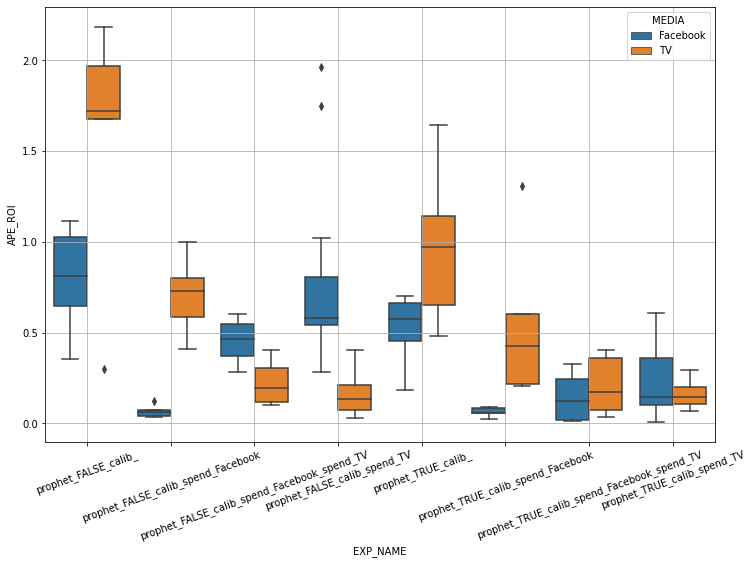

In [211]:
plt.figure(figsize=(12, 8))
sns.boxplot(x = "EXP_NAME", y = "APE_ROI", data = df.sort_values('EXP_NAME'), hue='MEDIA')
plt.xticks(rotation=20)
plt.grid()